In [19]:
import numpy as np
import pandas as pd 
from sklearn import linear_model 
import matplotlib.pyplot as plt

df = pd.read_excel("Dummy_One_HE_Exercise.xlsx")
df


,Car Model,Mileage,Sell_Price(USD),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez,67000,22000,6


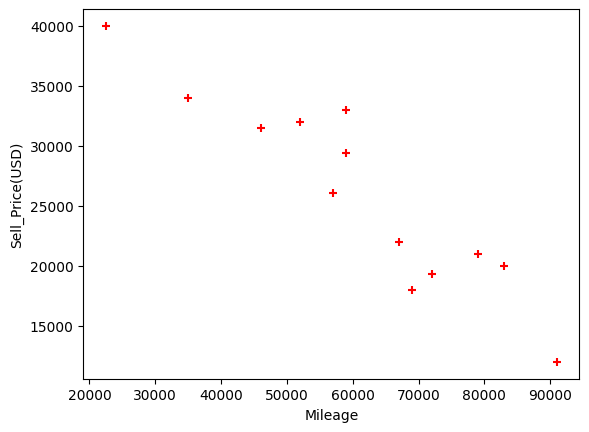

In [28]:
%matplotlib inline 
plt.xlabel("Mileage")
plt.ylabel("Sell_Price(USD)")
plt.scatter(df['Mileage'], df['Sell_Price(USD)'], color = "red", marker="+")
plt.show()

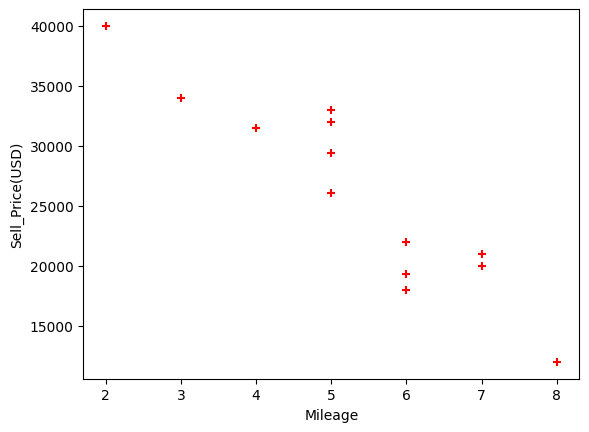

In [29]:
%matplotlib inline 
plt.xlabel("Mileage")
plt.ylabel("Sell_Price(USD)")
plt.scatter(df['Age(yrs)'], df['Sell_Price(USD)'], color = "red", marker="+")
plt.show()

In [50]:
# from above we can see the data is some how linear so here we can fit our regression line.

dum = pd.get_dummies(df["Car Model"])
dummy = dum[['Audi A5','BMW X5', 'Mercedez']].astype(int)
dummy

,Audi A5,BMW X5,Mercedez
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [48]:
df_1 = pd.concat([df, dummy], axis = 'columns' )
df_1

,Car Model,Mileage,Sell_Price(USD),Age(yrs),Audi A5,BMW X5,Mercedez
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez,67000,22000,6,0,0,1


In [57]:
# above we have created the dummy variables now we will keep all the elements ehose are needed and will 
# drop all the other columns 

df_2 = df_1.drop(['Car Model','Audi A5' ], axis = 'columns')
df_2

,Mileage,Sell_Price(USD),Age(yrs),BMW X5,Mercedez
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [58]:
# As we can see above our data for model training has been ready 

# extracting x variables 

x = df_2.drop(["Sell_Price(USD)"], axis = 'columns')
x


,Mileage,Age(yrs),BMW X5,Mercedez
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [61]:
y = df_2["Sell_Price(USD)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell_Price(USD), dtype: int64

In [63]:
model = linear_model.LinearRegression()
model

LinearRegression()

In [64]:
model.fit(x,y)

LinearRegression()

In [65]:
model.predict([[69000,6,1,0]])

/Users/pavankumar/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18705.2723644])

In [78]:
model.predict([[45000,4,0,1]])

/Users/pavankumar/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [79]:
model.predict([[86000, 7,1,0]])

/Users/pavankumar/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

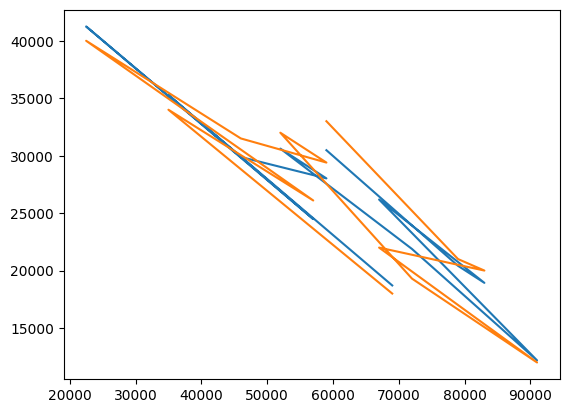

In [76]:
%matplotlib inline
predicted_prices = model.predict(df_2[['Mileage', 'Age(yrs)', 'BMW X5','Mercedez']])
# plt.plot(df_2.Age(yrs),,color = "blue")
predicted_prices
plt.plot(df_2['Mileage'], predicted_prices)
plt.plot(df['Mileage'],df['Sell_Price(USD)'])
plt.show()
         